# Problem 1
Capture at least three images, each one with the same three different objects from different
perspectives and using any camera. The images must comply the following requirements:
* Stable background: without significant textures and with an easily recognizable color as
background.
* Stable illumination: alluding to a controlled environment

Process each image according to these directives:
1. Ensure an appropriate amount of illumination through at least three point processing
methods, i.e., power-law transformation, piece-linear transformations, histogram equalization.
The implementation must be of your own and not copied from the Internet. Do not use an image
processing library.
2. Implement an OpenCV algorithm for histogram equalization and discuss the differences
between the results of this step and the previous one.
3. Compute a binary mask for each object in each image. A total of nine masks should be
obtained. To show these results, you must present the applied masks over the images, i.e.
segmentating the image through the masks.
4. Change the texture of at least two objects in each image. You can use a texture image in this
step.
5. If required use complementary stages.


# Libraries

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import requests
import shutil
from google.colab import files, drive
%matplotlib inline

# Upload


In [ ]:
uploaded = files.upload()

Saving background.jpg to background.jpg
Saving crem.jfif to crem.jfif
Saving lamp.jfif to lamp.jfif
Saving sharpener.jfif to sharpener.jfif


# Point processing methods

## Negative

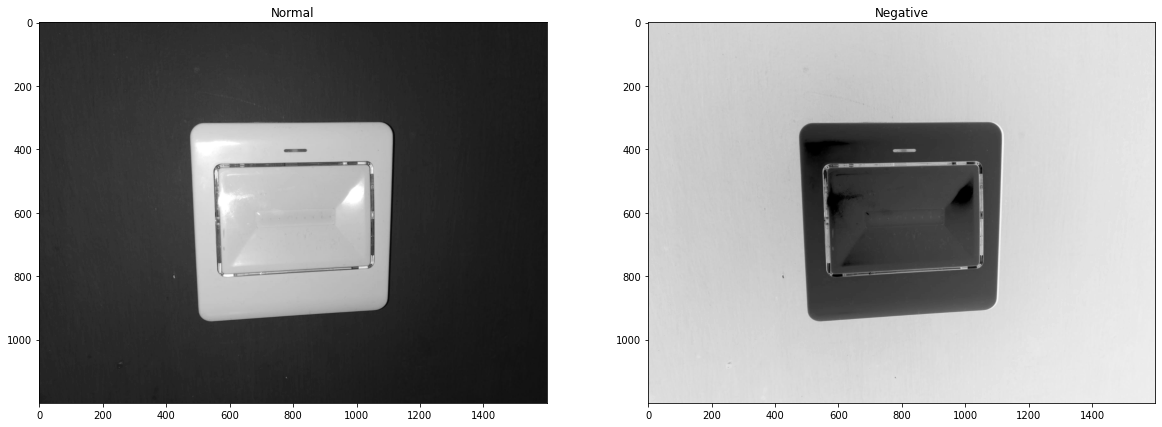

In [ ]:
jpeg = "lamp.jpeg" #@param ["cream.jpeg", "lamp.jpeg", "sharpener.jpeg"]
# read and convert the image to grayscale

image = cv2.imread(jpeg)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


image_negative = 255*np.ones(gray.shape)-gray

# bitwise lets us perform and, or, not operations. bitwise_not will negate the values. 
# image_negative = cv2.bitwise_not(image)

# plot both imagestbit
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Normal')
ax1.imshow(gray, cmap='gray')
ax2.set_title('Negative')
ax2.imshow(image_negative, cmap='gray')

## Exponential Law

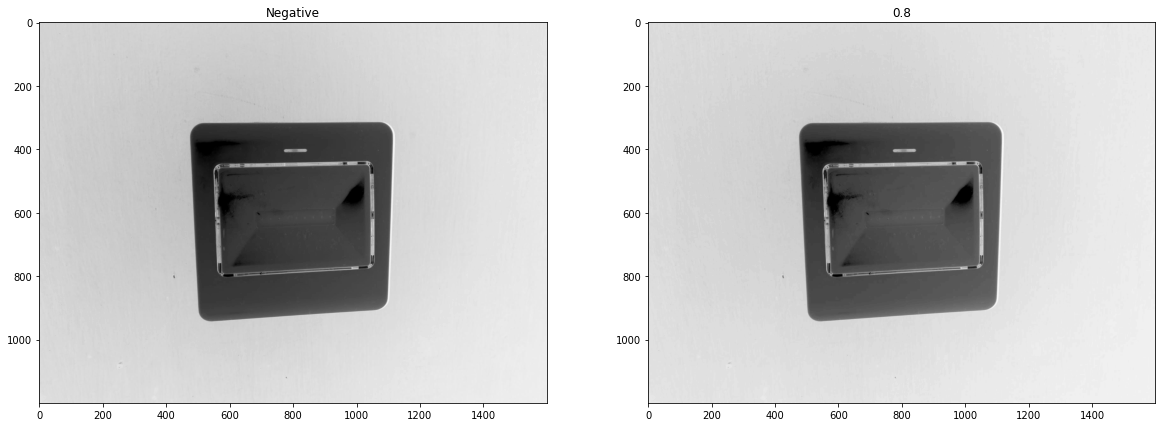

In [ ]:
gamma = 0.8 #@param {type:"slider", min:0, max:1, step:0.01}

gamma_corrected = (np.array((image_negative+1) ** gamma, dtype = 'uint8'))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Negative')
ax1.imshow(image_negative, cmap='gray')
ax2.set_title(gamma)
ax2.imshow(gamma_corrected, cmap='gray')

## Piecewise Linear

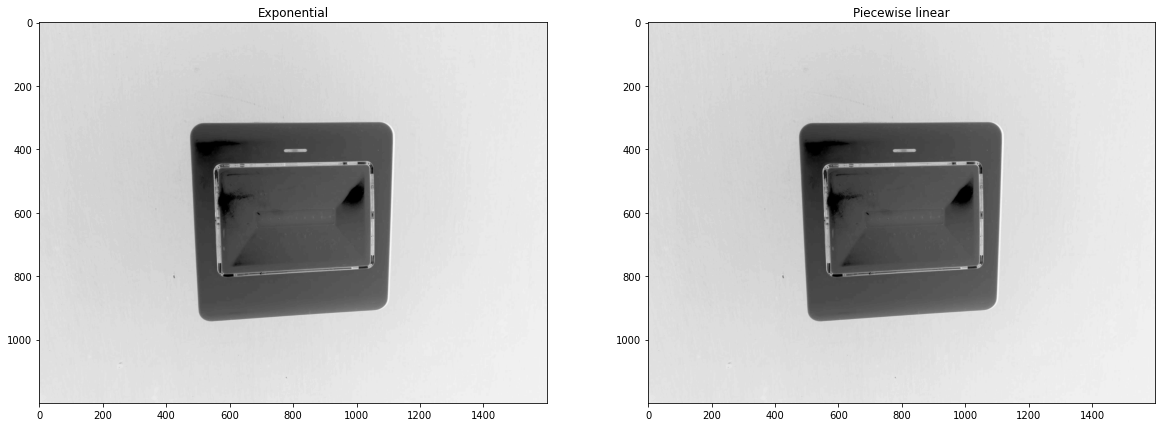

In [ ]:
piecewise_image = gamma_corrected/255
piecewise_image = 0.5 * piecewise_image
piecewise_image[piecewise_image<(50/255)] = 2 * piecewise_image[piecewise_image<(50/255)]
piecewise_image[piecewise_image>(100/255)] = 2 * piecewise_image[piecewise_image>(100/255)]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title("Exponential")
ax1.imshow(gamma_corrected, cmap='gray')
ax2.set_title('Piecewise linear')
ax2.imshow(piecewise_image, cmap='gray')

## Histogram equalization (manual)

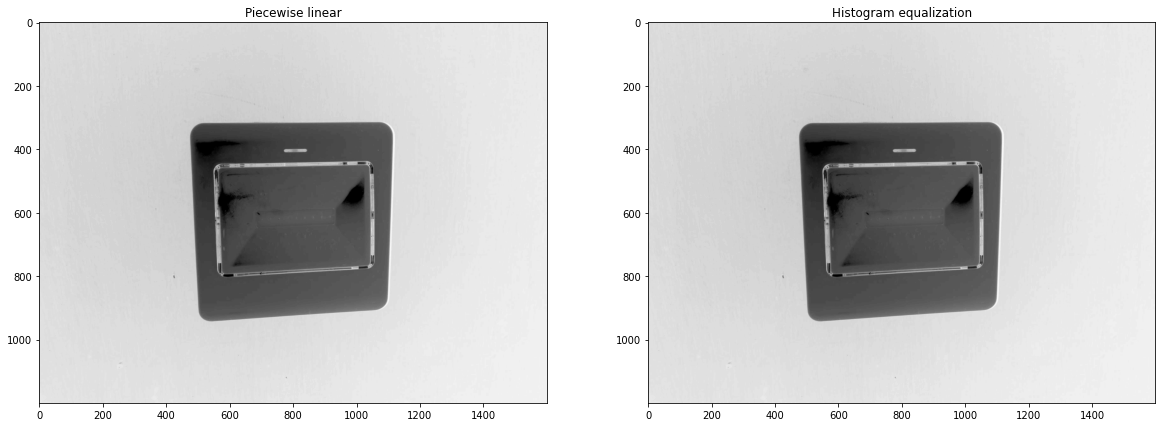

In [ ]:
manual_hist = piecewise_image

g_lvl = list(piecewise_image.flatten()*255)
g_lvl.sort()
g_lvl

unique_g_lvl = list(set(g_lvl))
unique_g_lvl.sort()

npixels = []

for i in unique_g_lvl:
  npixels.append(g_lvl.count(i))

pdf = npixels/np.sum(npixels)
cdf = np.add.accumulate(pdf)
cdf_7 = cdf*7
hist_round = np.ceil(cdf_7)
hist_round

for i,j in zip(unique_g_lvl, hist_round):
  manual_hist = np.where(manual_hist==i, j, manual_hist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10)) 
ax1.set_title('Piecewise linear')
ax1.imshow(piecewise_image, cmap='gray')
ax2.set_title("Histogram equalization")
ax2.imshow(manual_hist, cmap='gray')
plt.imsave('temp.png', piecewise_image, cmap='gray')

# Histogram equalization (OpenCV)

Text(0.5, 1.0, 'Manual vs opencv histogram equalization')

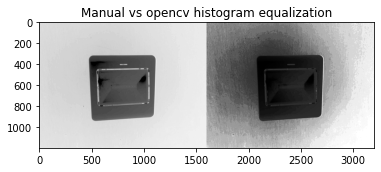

In [ ]:
#@markdown As we can see the results from the opencb library shows us more detail on the contrast of the image which is extremely different from the manual histogram that shows us almost the same primary image processed.
img = cv2.imread('temp.png',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))

plt.imshow(res, cmap='gray')
plt.title("Manual vs opencv histogram equalization")

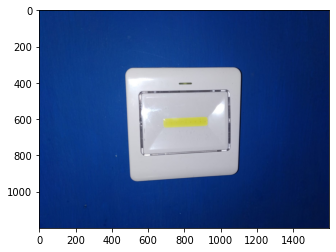

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

3

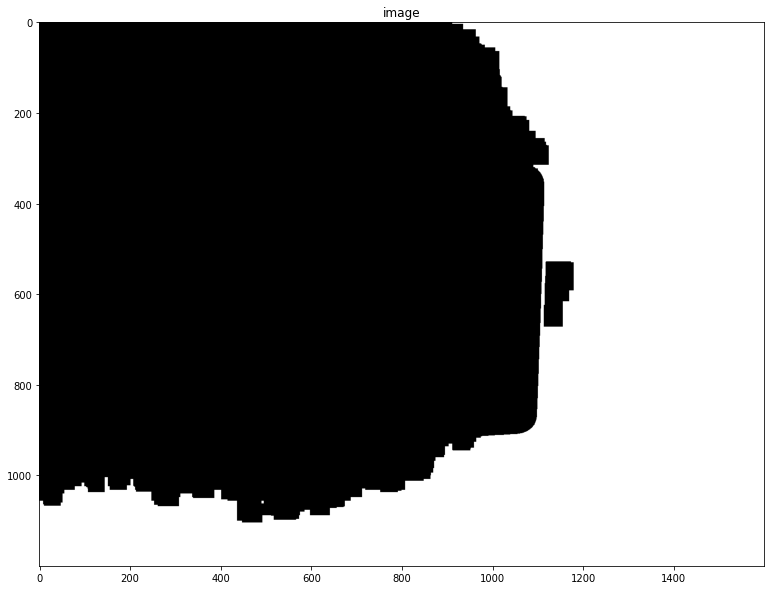

In [ ]:
# Define the color range for the mask
lower_pink = np.array([0,0,0])
upper_pink = np.array([120,50,50])


# Defining a binary mask for pink objects in the image
pink_mask1 = cv2.inRange(image, lower_pink, upper_pink)
#Applying erosion to the mask
pink_mask1 = cv2.erode(pink_mask1, np.ones((5,5),np.uint8), iterations = 1)
#Closing the mask
pink_mask1 = cv2.morphologyEx(pink_mask1, cv2.MORPH_CLOSE, np.ones((3,3),np.uint8), iterations = 20)
#Applying dilation to the mask
pink_mask1 = cv2.dilate(pink_mask1, np.ones((5,5),np.uint8), iterations = 1)

f, (ax1) = plt.subplots(1, figsize=(20,10))

ax1.set_title("image")
ax1.imshow(pink_mask1, cmap = 'gray')
plt.show()

4

In [ ]:
sup_masks = {'lamp.jpeg': np.array([184,184,194]), 'cream.jpeg': np.array([200,200,180]), 'sharpener.jpeg': np.array([50,180,190])}
inf_masks = {'lamp.jpeg': np.array([0,0,0]), 'cream.jpeg': np.array([0,0,0]), 'sharpener.jpeg': np.array([0,0,0])}

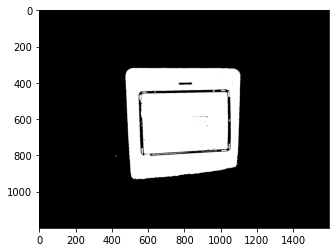

In [ ]:
mask = cv2.inRange(image, inf_masks[jpeg], sup_masks[jpeg])
if jpeg != 'lamp.png':
  mask = np.ones(mask.shape)*255-mask
plt.imshow(mask, cmap='gray')

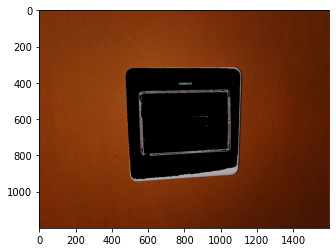

In [ ]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

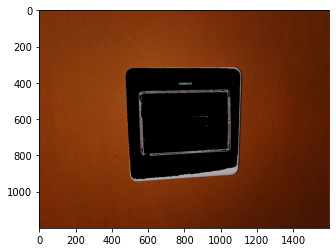

In [ ]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


In [ ]:
mask.shape

(1200, 1600)

In [ ]:
background_image.shape

NameError: ignored

In [ ]:

 
print('Original Dimensions : ',image.shape)
 
width = mask.shape[1]
height = mask.shape[0]
dim = (width, height)
 
# resize image
resized = cv2.resize(background_image, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
plt.imshow(resized)


In [ ]:
resized.shape

In [ ]:
# Load in a background image, and convert it to RGB 
#background_image = mpimg.imread('background.jpg')
#background_image = cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB) (655, 800, 3)

#background_image = background_image[0:mask.shape[0], mask.shape[1]]

masked_image2 = np.copy(resized)

masked_image2[mask == 0] = [0, 0, 0]

plt.imshow(masked_image2)


In [ ]:
plt.imshow(cv2.cvtColor(masked_image+masked_image2, cv2.COLOR_BGR2RGB))